https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

https://scikit-learn.org/stable/modules/mixture.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from matplotlib.patches import Patch

In [3]:
df = pd.read_csv('dados.csv')

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df

,Class_cluster,latitude,longitude,IPM,num_idhm,num_ivs,num_ibeu
0,3.0,0.568254,0.101425,0.542817,0.641,0.376,0.625
1,2.0,0.621077,0.069922,0.345086,0.702,0.268,0.709
2,2.0,0.527350,0.145262,0.534114,0.650,0.300,0.665
3,2.0,0.581156,0.117799,0.235062,0.718,0.255,0.776
4,2.0,0.535381,0.137219,0.443816,0.692,0.280,0.674
...,...,...,...,...,...,...,...
5560,NaN,0.442575,0.510836,0.190204,0.712,0.271,0.755
5561,NaN,0.416676,0.471691,0.130899,0.684,0.415,0.724
5562,NaN,0.487021,0.555299,0.226406,0.647,0.384,0.740
5563,NaN,0.476169,0.499719,0.345025,0.634,0.281,0.734


In [6]:
df = df.dropna()

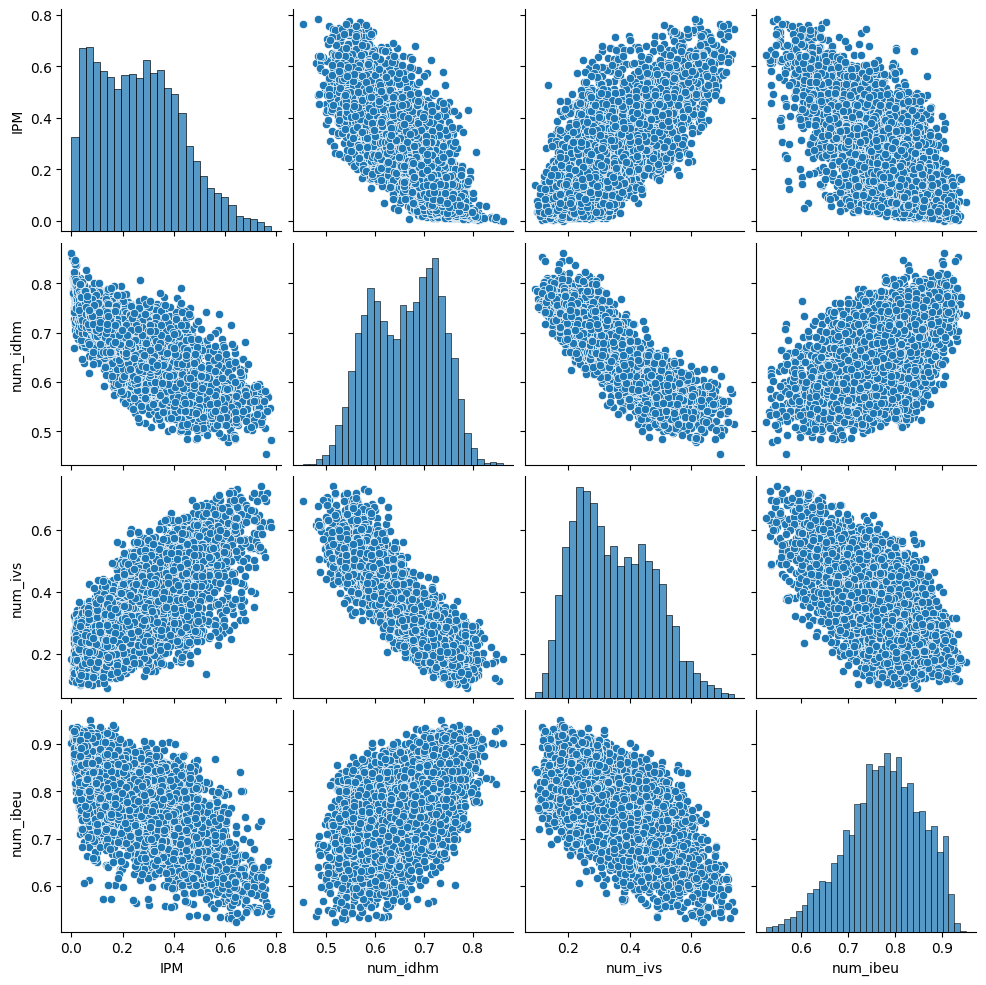

In [8]:
sns.pairplot(df[['IPM','num_idhm','num_ivs','num_ibeu']])

TREINAMENTO

In [28]:
train_data = df[['IPM','num_idhm','num_ivs','num_ibeu']]
data_df = df[['IPM','num_idhm','num_ivs','num_ibeu']]
y = df[['Class_cluster']]

In [8]:
train_data = train_data.to_numpy()
print(train_data)

[[0.54281707 0.641      0.376      0.625     ]
 [0.34508619 0.702      0.268      0.709     ]
 [0.53411391 0.65       0.3        0.665     ]
 ...
 [0.2834952  0.655      0.31       0.792     ]
 [0.33468884 0.634      0.303      0.656     ]
 [0.13723023 0.718      0.292      0.807     ]]


# SOM

In [18]:
# hyperparameters - definição do tamanho do grid
from numpy import ceil

num_nurons = 5*np.sqrt(train_data.shape[0])
grid_size = ceil(np.sqrt(num_nurons))
print(grid_size)

20.0


In [20]:
#Modelo - 5 * sqrt(number of training samples)
som = MiniSom( x= 20, y = 20, input_len=4, sigma = 1, learning_rate= 0.5, random_seed=42)

In [21]:
#init weights - uso de PCA
som.pca_weights_init(train_data)

In [22]:
som.train_random(data=train_data, num_iteration=1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.09579474962277758


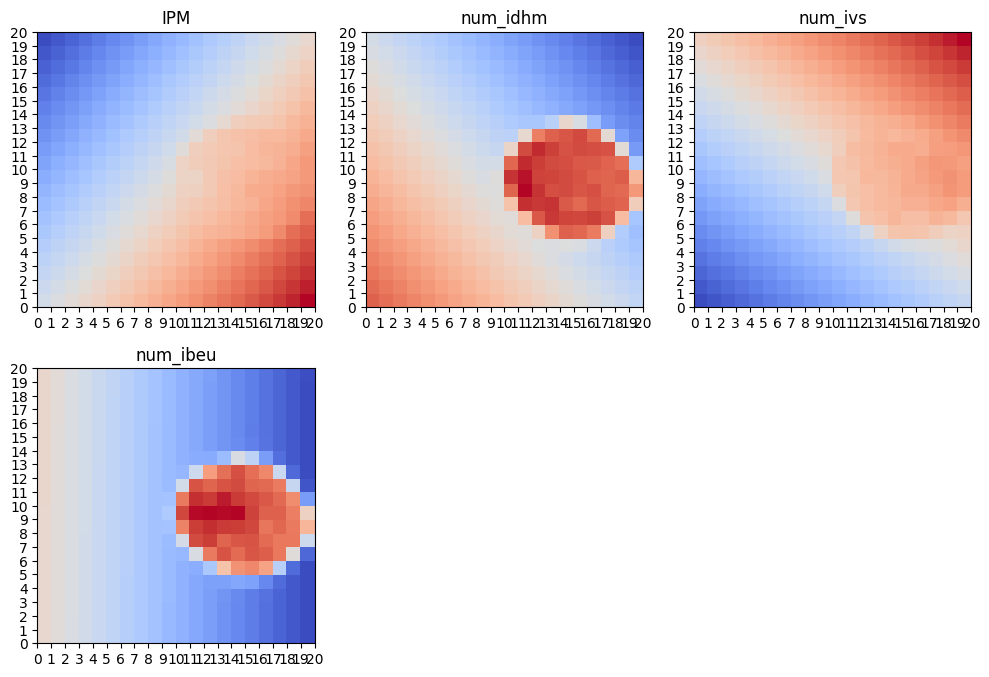

In [23]:
#Here we will create a map for each feature used that reflects the magnitude of the weights associated to it for each neuron.
feature_names ='IPM','num_idhm','num_ivs','num_ibeu'
size=20
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

C:\Users\Ranier\AppData\Local\Temp\ipykernel_9448\1960745034.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


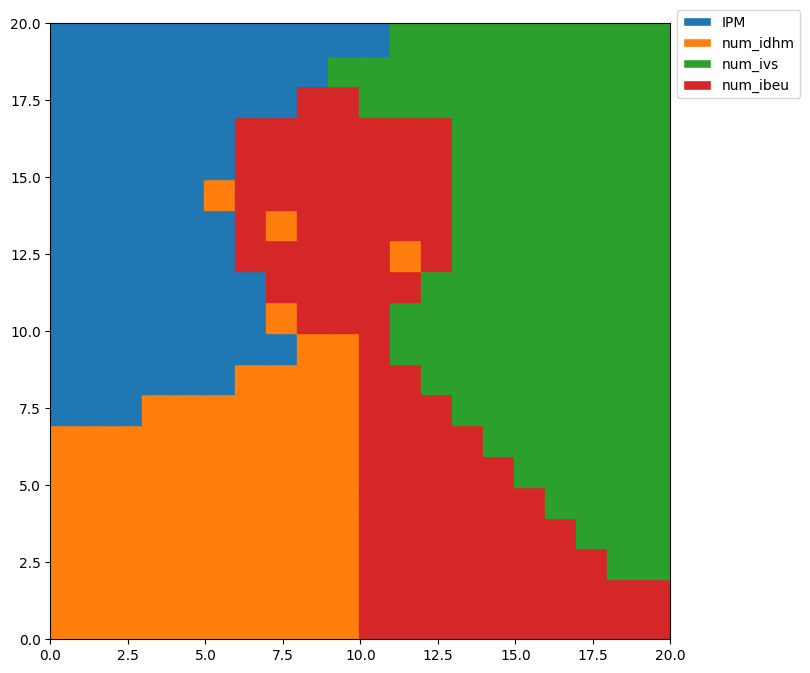

In [24]:
#In this map we associate each neuron to the feature with the maximum weight. 
#This segments our map in regions where specific features have high values.
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()

# EXPECTATION - MAXIMIZATION

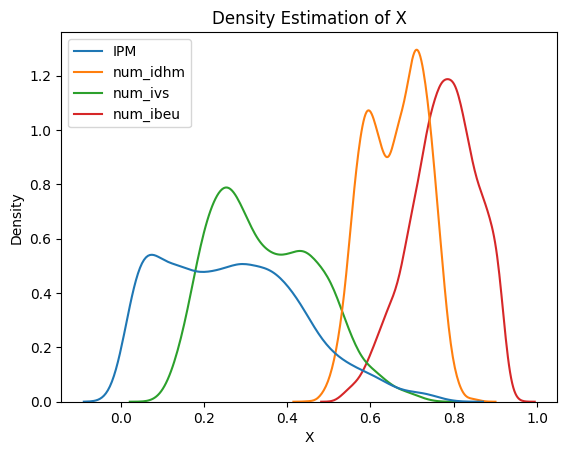

In [34]:
sns.kdeplot(train_data)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

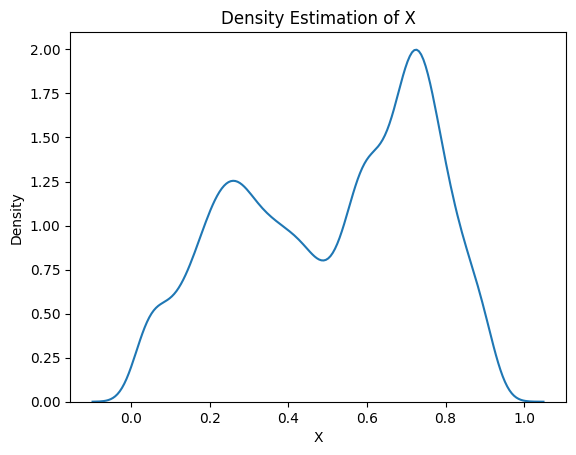

In [27]:
# Plot the density estimation using seaborn
gaussiaconc=np.concatenate(train_data)

sns.kdeplot(gaussiaconc)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

c:\Users\Ranier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Gaussian 1: μ = 0.35, σ = 0.098, weight = 0.26
Gaussian 2: μ = 0.76, σ = 0.077, weight = 0.33
Gaussian 3: μ = 0.17, σ = 0.089, weight = 0.18
Gaussian 4: μ = 0.61, σ = 0.082, weight = 0.23


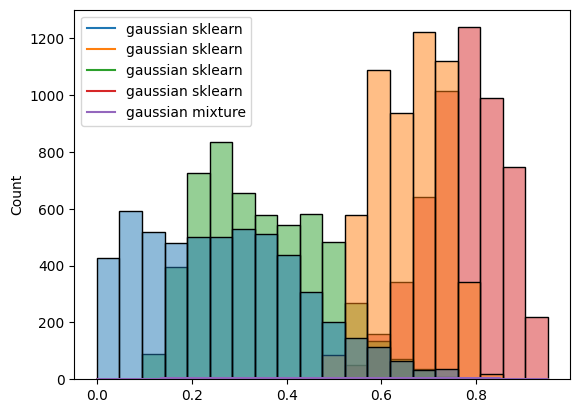

In [43]:
from scipy import stats
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4, tol=0.000001)
gmm.fit(np.expand_dims(gaussiaconc, 1)) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
Gaussian_nr = 1
#print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
#print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = stats.norm(mu, sd).pdf(gaussiaconc) * p
    plt.plot(gaussiaconc, g_s, label='gaussian sklearn');
    Gaussian_nr += 1
sns.histplot(train_data, bins=20, kde=False)
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in gaussiaconc]) #gmm gives log probability, hence the exp() function
plt.plot(gaussiaconc, gmm_sum, label='gaussian mixture')
plt.legend()

In [61]:
# define gmm
gmm = GaussianMixture(n_components= 6)

# fit and predict to X
cluster_gmm = gmm.fit_predict(train_data)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

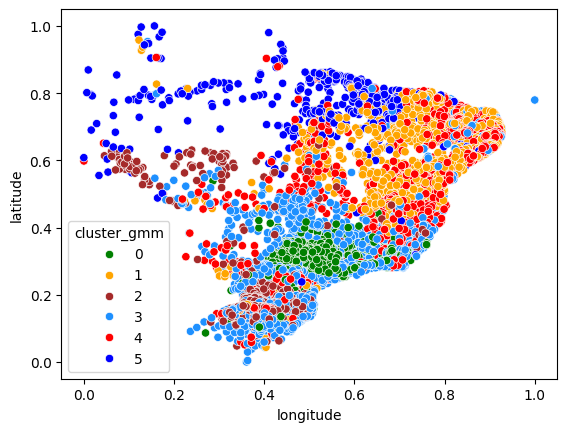

In [68]:
sns.scatterplot(
    data = df, 
    x = 'longitude', 
    y = 'latitude', 
    hue = df['cluster_gmm'],
    palette=['green','orange','brown','dodgerblue','red','blue'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Análise da composição dos clusters - IBEU')]

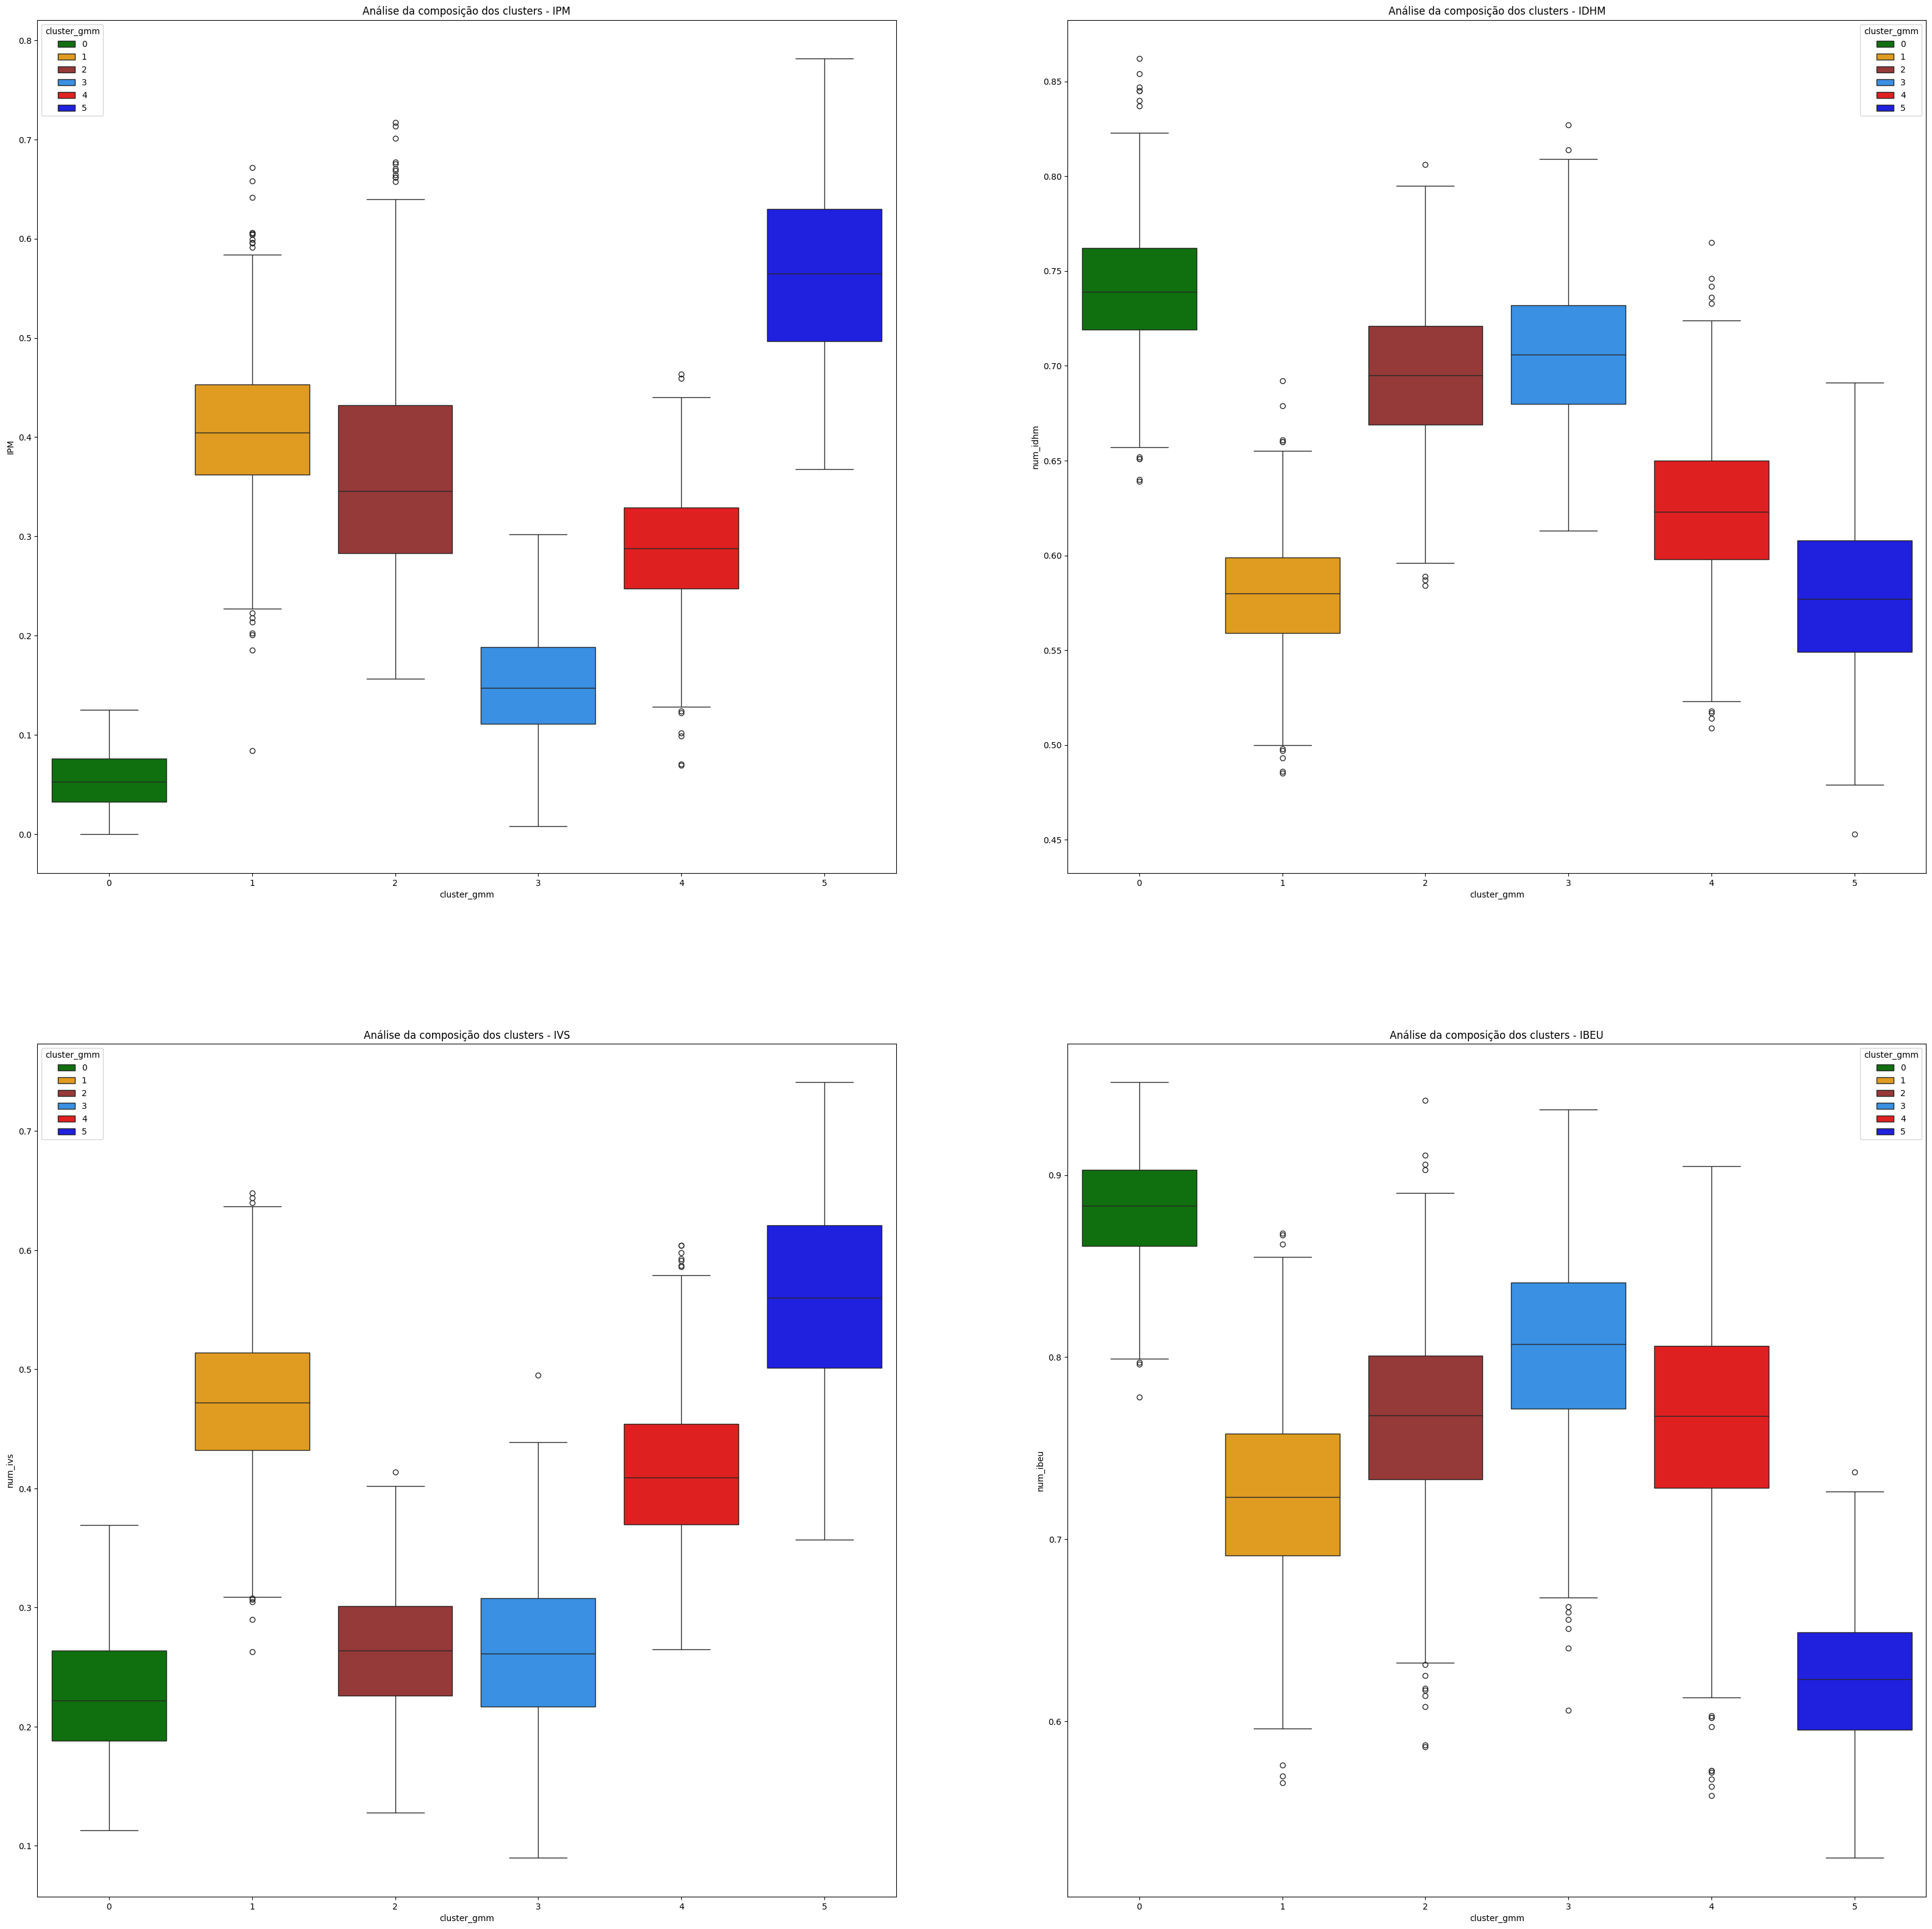

In [69]:
#Visualização da composição dos clusters pelos indicadores apresentados
fig, axes = plt.subplots(2, 2, figsize=(40, 40))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.boxplot(data = df,
            x = 'cluster_gmm', 
            y = df['IPM'], 
            hue = 'cluster_gmm',
            ax=axes[0,0],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IPM')

sns.boxplot(data = df,
            x = 'cluster_gmm', 
            y = df['num_idhm'], 
            hue = 'cluster_gmm',
            ax=axes[0,1],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IDHM')

sns.boxplot(data = df,
            x = 'cluster_gmm', 
            y = df['num_ivs'], 
            hue = 'cluster_gmm',
            ax=axes[1,0],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IVS')

sns.boxplot(data = df,
            x = 'cluster_gmm', 
            y = df['num_ibeu'], 
            hue = 'cluster_gmm',
            ax=axes[1,1],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IBEU')

VERDE = CLUSTER 0 - MAIS RICO <br>
AMARELO = CLUSTER 1 - RAZOAVELMENTE POBRE  <br>
AZUL CLARO = CLUSTER 3 - SEGUNDO MAIS RICO  <br>
MARROM E AZUL = CLUSTER 2, 4 - INTERMEDIARIO  <br>
AZUL ESCURO = CLUSTER 5 = MAIS POBRE  <br>